In [1]:
import numpy as np
import pandas as pd
import sys
from iminuit import Minuit

/tmp/ipykernel_1021/650018753.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
sys.path.append("../../../../../") #Sorry about this one /Asbjørn
import myfuncs as my
my.init_plotting()
save = my.plot_saving("../Report/figures/",save=True).saveplot

In [60]:
output_data = pd.read_csv("output_data.txt",sep="\\s+")
output_data_Amdahl = pd.read_csv("output_data_Amdahl.txt",
                                 sep="\\s+")

In [61]:
output_data.sort_values(by=["version","nthreads"])
output_data_Amdahl.sort_values(by=["version","nthreads"])

,Wave_zero_point,coeff_1,coeff_2,coeff_3,coeff_4,t_fft,t_no_fft,t_total,nfreq,nthreads,version,checksum
7,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.528,0.0000,19.070,1048576.0,1.0,0.0,23.291276
140,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.519,0.0000,19.060,1048576.0,1.0,0.0,23.291276
161,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.516,0.0000,19.050,1048576.0,1.0,0.0,23.291276
269,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.520,0.0000,19.060,1048576.0,1.0,0.0,23.291276
302,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.513,0.0000,19.040,1048576.0,1.0,0.0,23.291276
...,...,...,...,...,...,...,...,...,...,...,...,...
9468,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.376,0.3670,1.743,1048576.0,62.0,3.0,23.291276
9580,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.366,0.3708,1.737,1048576.0,62.0,3.0,23.291276
9670,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.362,0.3683,1.730,1048576.0,62.0,3.0,23.291276
9716,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.372,0.3682,1.740,1048576.0,62.0,3.0,23.291276


In [68]:
def amdahl(N,a,s):
    return a/(s+(1-s)/N)

def _least_squares(x,y,err,a,s):
    ymod = amdahl(x,a,s)
    return np.sum((ymod-y)**2/err**2)

def least_squares_v(v):
    return lambda a,s: _least_squares(threads, data["t_total"].max()/data_times,data_err, a ,s)    
    return lambda a,s: _least_squares(data["nthreads"].to_numpy(), data["t_total"].max()/data["t_total"].to_numpy(), a ,s)
Vtimes = np.zeros((3,len(list(set(output_data_Amdahl.nthreads)))))
Verrs = np.zeros((3,len(list(set(output_data_Amdahl.nthreads)))))
v=1
mask = output_data_Amdahl["version"] == v
data = output_data_Amdahl.where(mask).dropna(axis=0)
threads = np.sort(list(set(data.nthreads)))
data_times = np.zeros(len(threads))
data_err = np.zeros(len(threads))
for i in range(len(threads)):
    data_times[i] = np.mean(data.t_total[data.nthreads==threads[i]])
    data_err[i] =np.std(data.t_total[data.nthreads==threads[i]],ddof=1)
    print(sum(data.nthreads==threads[i]))
print(data_times)
print(data_err)
Vtimes[0] = data_times
Verrs[0] = data_err

v1_min = Minuit(least_squares_v(1), a = 1, s = 0.09)
v1_min.limits["a"] = 0.01,None
v1_min.fixed["a"] = False
display(v1_min.migrad())
a1,s1 = v1_min.values[:]

v=2
mask = output_data_Amdahl["version"] == v
data = output_data_Amdahl.where(mask).dropna(axis=0)
threads = np.sort(list(set(data.nthreads)))
data_times = np.zeros(len(threads))
data_err = np.zeros(len(threads))
for i in range(len(threads)):
    data_times[i] = np.mean(data.t_total[data.nthreads==threads[i]])
    data_err[i] =np.std(data.t_total[data.nthreads==threads[i]],ddof=1)
    print(sum(data.nthreads==threads[i]))
Vtimes[1] = data_times
Verrs[1] = data_err
v2_min = Minuit(least_squares_v(2), a = 1, s = 0.09)
v2_min.limits["a"] = 0.01,None
v2_min.fixed["a"] = False
display(v2_min.migrad())
a2,s2 = v2_min.values[:]


v=3
mask = output_data_Amdahl["version"] == v
data = output_data_Amdahl.where(mask).dropna(axis=0)
threads = np.sort(list(set(data.nthreads)))
data_times = np.zeros(len(threads))
data_err = np.zeros(len(threads))
for i in range(len(threads)):
    data_times[i] = np.mean(data.t_total[data.nthreads==threads[i]])
    data_err[i] =np.std(data.t_total[data.nthreads==threads[i]],ddof=1)
Vtimes[2] = data_times
Verrs[2] = data_err

v3_min = Minuit(least_squares_v(3), a = 1, s = 0.09)
v3_min.limits["a"] = 0.01,None
v3_min.fixed["a"] = False
display(v3_min.migrad())
a3,s3 = v3_min.values[:]

301
301
301
101
301
101
101
101
301
101
101
101
101
101
101
101
301
101
101
101
101
101
101
101
101
101
101
101
101
101
101
301
[19.19754153 10.46212625  6.97586047  5.17967327  4.27680731  3.73644554
  3.36760396  3.113       2.91498671  2.7590198   2.64008911  2.53921782
  2.45649505  2.38572277  2.28553465  2.24154455  2.19734551  2.16058416
  2.16583168  2.14130693  2.11638614  2.10192079  2.06872277  2.04634653
  2.02987129  2.01283168  1.99314851  1.97768317  1.94944554  1.915
  1.90661386  1.89584385]
[0.0173763  0.01749659 0.17497436 0.04490882 0.04414109 0.05397138
 0.01461375 0.05067603 0.0143506  0.00974985 0.0186151  0.00815304
 0.00914399 0.0070429  0.00716598 0.04406507 0.01386074 0.00659434
 0.00946474 0.00796334 0.00827039 0.07144308 0.01777364 0.00696482
 0.02449803 0.03938047 0.01401027 0.01164812 0.01028637 0.00518845
 0.01556918 0.00748502]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1771                       │              Nfcn = 54               │
│ EDM = 9.75e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.8596   │  0.0016   │            │            │  0.01   │         │       │
│ 1 │ s    │ 69.87e-3  │  0.18e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        s │
├───┼───────────────────┤
│ a │ 2.58e-06 0.286e-6 │
│ s │ 0.286e-6  3.2e-08 │
└───┴───────────────────┘

1
1
1
101
1
101
101
101
1
101
101
101
101
101
101
101
1
101
101
101
101
101
101
101
101
101
101
101
101
101
101
1


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = nan                        │              Nfcn = 204              │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │     1     │    nan    │            │            │  0.01   │         │       │
│ 1 │ s    │   9e-2    │    nan    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │   a   s │
├───┼─────────┤
│ a │ nan nan │
│ s │ nan nan │
└───┴─────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = nan                        │              Nfcn = 204              │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │     1     │    nan    │            │            │  0.01   │         │       │
│ 1 │ s    │   9e-2    │    nan    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │   a   s │
├───┼─────────┤
│ a │ nan nan │
│ s │ nan nan │
└───┴─────────┘

In [6]:
least_squares_v(1)(0.04,0.07)

1847.9423710219373

In [9]:
import matplotlib.pyplot as plt

In [8]:
for d in my.cc+my.mc:
    print(d)

{'color': '#f76462', 'marker': 'o'}
{'color': '#f40b1e', 'marker': '^'}
{'color': '#459da1', 'marker': 's'}
{'color': '#1762df', 'marker': 'H'}
{'color': '#002e7b', 'marker': 'D'}
{'color': '#9f80ec', 'marker': '*'}
{'color': '#0b000c', 'marker': '>'}
{'color': '#540212', 'marker': 'p'}


In [17]:
output_data_Amdahl.where(output_data_Amdahl["version"] == 3)

,Wave_zero_point,coeff_1,coeff_2,coeff_3,coeff_4,t_fft,t_no_fft,t_total,nfreq,nthreads,version,checksum
0,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.323,1.0180,2.341,1048576.0,22.0,3.0,23.291276
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.345,0.8527,2.198,1048576.0,26.0,3.0,23.291276
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.299,1.2480,2.547,1048576.0,18.0,3.0,23.291276
...,...,...,...,...,...,...,...,...,...,...,...,...
7690,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.352,0.6308,1.983,1048576.0,36.0,3.0,23.291276
7691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7692,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.340,5.5150,6.854,1048576.0,4.0,3.0,23.291276
7693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
Verrs

array([[0.0173763 , 0.01749659, 0.17497436, 0.04490882, 0.04414109,
        0.05397138, 0.01461375, 0.05067603, 0.0143506 , 0.00974985,
        0.0186151 , 0.00815304, 0.00914399, 0.0070429 , 0.00716598,
        0.04406507, 0.01386074, 0.00659434, 0.00946474, 0.00796334,
        0.00827039, 0.07144308, 0.01777364, 0.00696482, 0.02449803,
        0.03938047, 0.01401027, 0.01164812, 0.01028637, 0.00518845,
        0.01556918, 0.00748502],
       [       nan,        nan,        nan, 0.05520244,        nan,
        0.03437677, 0.02493084, 0.02624827,        nan, 0.03460072,
        0.06382471, 0.02687839, 0.03129782, 0.03122918, 0.02944606,
        0.02805417,        nan, 0.03527767, 0.02788255, 0.02832711,
        0.02766547, 0.02575554, 0.02135274, 0.0204583 , 0.02019154,
        0.01810309, 0.01530548, 0.01372299, 0.01075778, 0.00679696,
        0.00742848,        nan],
       [       nan,        nan,        nan, 0.05803949,        nan,
        0.03358598, 0.02413783, 0.02341991,       

/home/jovyan/work/HPPC/HPPC_repo/Assignment_4_Inverse_problems/Code/myfuncs.py:276: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(*dim,figsize=size,**kwargs)


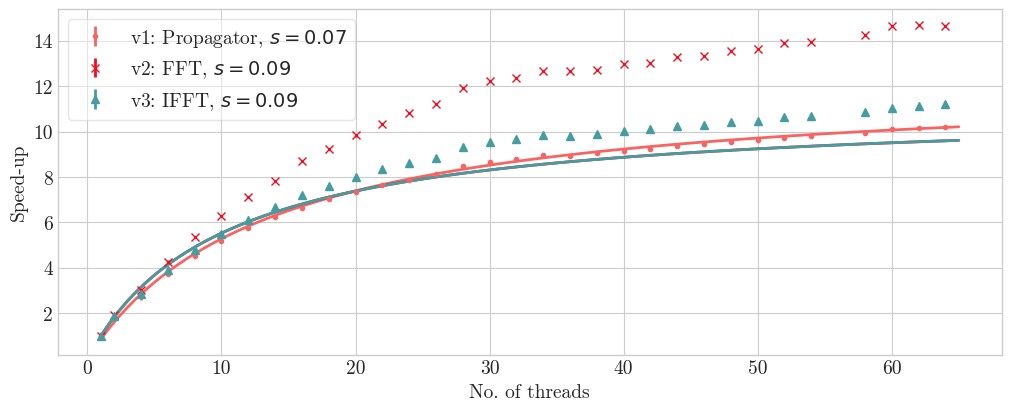

In [66]:
fig, ax = my.standard_plot()
markers = [".","x","^"]
changes = ["Propagator", "FFT", "IFFT"]
fit_pars = [[a1,s1],[a2,s2],[a3,s3]]
Ns = np.linspace(1,65,100)
for i in range(3):
    version = i+1
    data = output_data_Amdahl.where(output_data_Amdahl["version"] == version)
    time = data["t_total"]
    #data_points, = ax.plot(data["nthreads"], time.max()/time, markers[i],
    data_points,*_ = ax.errorbar(threads,time.max()/Vtimes[i],yerr = Verrs[i],fmt=markers[i],
                    label=f"v{int(version)}: {changes[i]}, $s={fit_pars[i][1]:.2f}$")
    ax.plot(Ns,amdahl(Ns,*fit_pars[i]),color = data_points.get_color())
    
ax.set(xlabel="No. of threads", ylabel="Speed-up")
ax.legend() 
save(fig, "amdahl.pdf")

In [56]:
data

,Wave_zero_point,coeff_1,coeff_2,coeff_3,coeff_4,t_fft,t_no_fft,t_total,nfreq,nthreads,version,checksum
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4.795800e-09,-0.014087,-0.017407,-0.019272,-0.019317,0.3173,1.322,1.639,262144.0,4.0,3.0,23.291276
2,-7.493500e-11,-0.014087,-0.017407,-0.019272,-0.019317,23.9700,5.478,29.440,16777216.0,64.0,3.0,23.291276
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2118,-2.397900e-09,-0.014087,-0.017407,-0.019272,-0.019317,0.6923,4.480,5.172,524288.0,2.0,3.0,23.291276
2119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


7
[ 1.  2.  4.  8. 16. 32. 64.] [ 0.99909325  1.72489201 11.45225458  5.42178474  9.59572469 16.4165347
 24.4605845 ] [6.70117130e-04 2.61467409e-03 2.77505079e+00 5.07733290e-02
 5.25268258e-02 8.47468494e-02 9.04950225e-02]


/home/jovyan/work/HPPC/HPPC_repo/Assignment_4_Inverse_problems/Code/myfuncs.py:276: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(*dim,figsize=size,**kwargs)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.505e+04                  │              Nfcn = 34               │
│ EDM = 7.06e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.4731   │  0.0011   │            │            │         │         │       │
│ 1 │ b    │  0.5417   │  0.0013   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 1.17e-06  -1.3e-6 │
│ b │  -1.3e-6 1.76e-06 │
└───┴───────────────────┘

7
[ 1.  2.  4.  8. 16. 32. 64.] [ 0.99897522  1.84139966 12.28376085  6.10170869 11.25993316 21.12594219
 34.34183814] [6.73914348e-04 2.51634544e-03 3.28601663e+00 6.61929665e-02
 5.26203404e-01 7.76537297e-01 8.16295434e-02]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.183e+04                  │              Nfcn = 34               │
│ EDM = 4.92e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.5934   │  0.0012   │            │            │         │         │       │
│ 1 │ b    │  0.4221   │  0.0014   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 1.32e-06  -1.4e-6 │
│ b │  -1.4e-6 1.94e-06 │
└───┴───────────────────┘

7
[ 1.  2.  4.  8. 16. 32. 64.] [ 0.99454104  1.76281776 11.72894149  5.68058137 10.24389389 18.01869053
 27.50045258] [4.16681119e-02 2.80184497e-03 2.92663994e+00 4.81703766e-02
 7.53205599e-02 1.04009591e-01 7.82493307e-02]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2967                       │              Nfcn = 31               │
│ EDM = 2.96e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.4426   │  0.0012   │            │            │         │         │       │
│ 1 │ b    │   0.884   │   0.004   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 1.32e-06  -2.8e-6 │
│ b │  -2.8e-6 1.38e-05 │
└───┴───────────────────┘

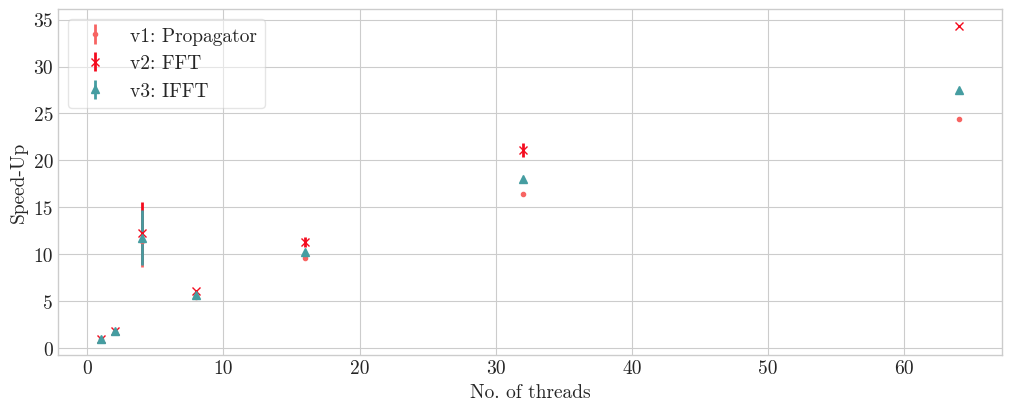

In [57]:
def lin_least_sq(x,y,err):
    return lambda a,b: np.sum((a*x+b-y)**2/err**2)

fig, ax = my.standard_plot()

markers = [".","x","^"]
changes = ["Propagator", "FFT", "IFFT"]
for i in range(3):
    version = i+1
    vmask = output_data["version"] == version
    data = output_data.where(vmask)
    time = output_data["t_total"].where(vmask)
    nfreq = output_data["nfreq"].where(vmask)

    threads = np.sort(list(set(data.nthreads.dropna())))
    print(len(threads))
    data_t_no = np.zeros(len(threads))
    data_t_fft=np.zeros(len(threads))
    data_err_no = np.zeros(len(threads))
    data_err_fft=np.zeros(len(threads))
    for j in range(len(threads)):
        data_t_no[j] = np.mean(data.t_no_fft[data.nthreads==threads[j]])
        data_err_no[j] =np.std(data.t_no_fft[data.nthreads==threads[j]],ddof=1)
        data_t_fft[j] = np.mean(data.t_fft[data.nthreads==threads[j]])
        data_err_fft[j] =np.std(data.t_fft[data.nthreads==threads[j]],ddof=1)
        
    
    #speed_up = (time.min() / nfreq.min() )  / (time / nfreq )
    lt = np.log(threads)
    lt[0] = 1
    min_time = time[data.nthreads==1].min()
    speed_up = (min_time )  / (data_t_no + data_t_fft/lt) * threads
    speed_err= speed_up/(data_t_no + data_t_fft/lt)*np.sqrt(data_err_no**2 + data_err_fft**2/lt**2)
    x,y,err = threads,speed_up,speed_err
    print(x,y,err)
    min = Minuit(lin_least_sq(x,y,err), a= 0.5,b=0)
    display(min.migrad())
    
    ax.errorbar(threads,
            speed_up,yerr = speed_err, fmt = markers[i], label=f"v{int(version)}: {changes[i]}")

ax.set(xlabel="No. of threads", ylabel="Speed-Up")
ax.legend() 

save(fig, "weak_scaling_corrected.pdf")

/home/jovyan/work/HPPC/HPPC_repo/Assignment_4_Inverse_problems/Code/myfuncs.py:276: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(*dim,figsize=size,**kwargs)


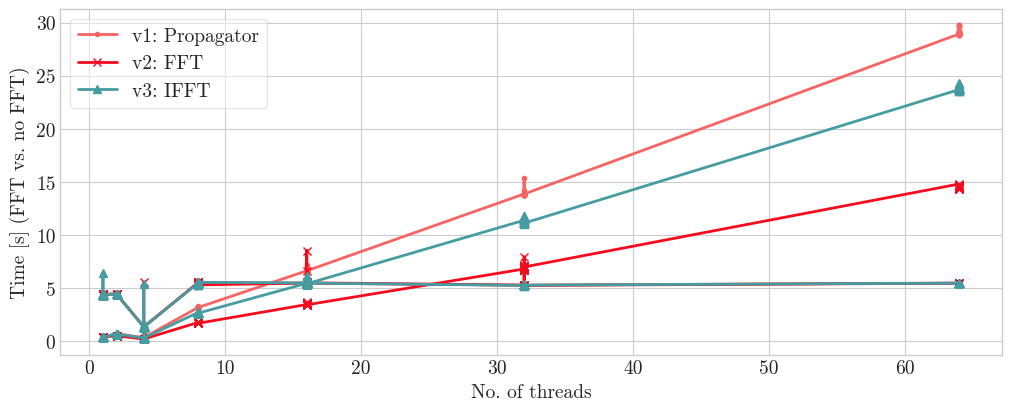

In [54]:
fig, ax = my.standard_plot()

markers = [".","x","^"]
changes = ["Propagator", "FFT", "IFFT"]
for i in range(3):
    version = i+1
    vmask = output_data["version"] == version
    data = output_data.where(vmask).sort_values(by=["nthreads"])
    time = data["t_total"]
    nthreads = data["nthreads"]
    fft, = ax.plot(nthreads,data["t_fft"],
           markers[i],ls="-", label=f"v{int(version)}: {changes[i]}")
    ax.plot(nthreads,data["t_no_fft"],
            markers[i],ls="-", color = fft.get_color())

ax.set(xlabel="No. of threads", ylabel="Time [s] (FFT vs. no FFT)")
ax.legend() 

save(fig, "FFT_scaling.pdf")
